# Turbo Engine data description

CMAPSS stands for Commercial Modular Aero-Propulsion System Simulation. It is a system developed by NASA to study engine degradation. It is coded in MATLAB and Simulink (A toolbox of MATLAB). 

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT). 

During operation, degradation occurs in each of the components. If degradation level in any component exceeds a threshold, the engine is said to have failed. We don't want jet engines to fail mid-air. Therefore, jet engines are inspected before every take off. This is a form of periodic maintenance that is not cost effective. 

But given the critical nature of operation (considering human lives involved), this form of maintenance strategy is justified. Even then, we need a system that can given us early warning if something is going to fail. 

An early warning, in many cases, may help us prepare for the problem, if not prevent it altogether. A sufficiently early warning will enable us to prevent the disaster. But if an early warning is too conservative, it will lead to unnecessary waste of money. So, aim of a predictive maintenance system is to predict the RUL as accurately as possible such that it is neither too early nor too late. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
raw_data = pd.read_csv('Attacked_data_random.txt', sep=' ', header = None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100,38.86,23.3735,0,NaN,NaN
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100,39.02,23.3916,0,NaN,NaN
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100,39.08,23.4166,0,NaN,NaN
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100,39.00,23.3737,0,NaN,NaN
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100,38.99,23.4130,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100,38.65,23.1974,1,NaN,NaN
13092,100,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100,38.57,23.2771,1,NaN,NaN
13093,100,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100,38.62,23.2051,1,NaN,NaN
13094,100,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100,38.66,23.2699,1,NaN,NaN


In [39]:
raw_data = raw_data.drop([26,27,28], axis='columns')

* `Column 1`: Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)
* `Column 2`: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines. 
* `Columns 3,4,5`: 3 operational settings
* `Columns 6-26`: 21 sensor measurements

In [40]:
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,...,520.69,2388.00,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,521.05,2388.09,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,...,521.18,2388.04,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051
13094,100,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,...,521.33,2388.08,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699


In [41]:
raw_data[raw_data['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130
5,1,6,0.0012,0.0003,100,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100,38.91,23.3467
6,1,7,-0.0000,0.0002,100,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100,38.85,23.3952
7,1,8,0.0006,-0.0000,100,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100,39.05,23.3224
8,1,9,-0.0036,0.0000,100,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100,39.10,23.4521
9,1,10,-0.0025,-0.0001,100,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100,38.87,23.3820


In [42]:
# Making an array which contains EOL of all the Ids
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [43]:
np.shape(EOL)

(13096,)

In [44]:
# Append the "EOL" column
raw_data["EOL"]=EOL

In [45]:
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,31
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,31
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,31
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,...,2388.00,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974,198
13092,100,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,2388.09,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,198
13093,100,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,...,2388.04,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051,198
13094,100,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,...,2388.08,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699,198


<h2>Classification Problem Formulation</h2>

The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. 

But in this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. **Good Condition, Moderate Condition and Warning Condition**.

<h4>labels corresponding to each conditions</h4>

- Good Condition -     0
- Moderate Condition - 1
- Warning Condition -  2

<h2>Defining the labels</h2>

Here we will define the engine's condition with **Life Ratio (LR)**, which is the ratio between **Current Cycle** and the **End cycle/ End of Life(EOL)**. If **LR=0**, that means the component has just started its degradation and **LR=1** means, it is completely degraded.

- if LR <= 0.6 -       Good Condition
- if 0.6 < LR <= 0.8 - Moderate Condition
- if 0.8 < LR -        Warning Condition

In [46]:
# Calculate "LR"
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])

In [47]:
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,31,0.032258
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,31,0.064516
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,31,0.096774
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,31,0.129032
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,31,0.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,...,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974,198,0.979798
13092,100,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,198,0.984848
13093,100,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,...,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051,198,0.989899
13094,100,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,...,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699,198,0.994949


In [48]:
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])

In [49]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,0
1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,0
2,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,0
3,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,0
4,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,21.61,...,2388.00,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,21.61,...,2388.09,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,21.61,...,2388.04,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051,2
13094,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,21.61,...,2388.08,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699,2


In [53]:
df=raw_data
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,0
1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,0
2,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,0
3,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,0
4,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,21.61,...,2388.00,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,21.61,...,2388.09,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,21.61,...,2388.04,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051,2
13094,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,21.61,...,2388.08,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699,2


**X** is the Feature Matrix and **y** is the label's column

In [54]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

<h2>Training a K Nearest Neighbor model</h2>

In [56]:
from sklearn.neighbors import KNeighborsClassifier 

In [57]:
model =KNeighborsClassifier(n_neighbors=49) 


In [58]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

<h2>Performance on Validation set<h2>

C:\Users\shyam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7877862595419848

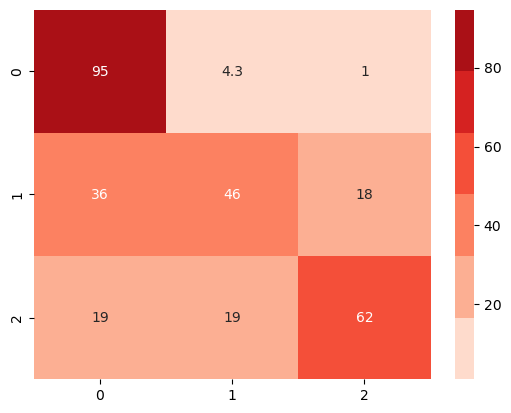

In [64]:
y_pred_RF = model.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [65]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 49,
 'p': 2,
 'weights': 'uniform'}